In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split

In [103]:
df = pd.read_csv('C:/Users/shu_n/Desktop/Kepler CS/Data/russ.csv', sep=';', index_col=['Date']) #parse_dates=['Date']
df.head()

,AAPL,AMZN,BA,BAC,BRK-B,CSCO,CVX,FB,GOOG,HD,...,PFE,PG,T,UNH,V,VZ,WFC,WMT,XOM,RUI
Date,,,,,,,,,,,,,,,,,,,,,
14/01/2015,109.800003,293.269989,130.380005,16.040001,147.820007,27.92,103.900002,76.279999,499.498627,102.639999,...,32.480000,89.989998,33.330002,103.330002,63.889999,46.970001,51.250000,86.610001,89.739998,1118.859985
15/01/2015,106.820000,286.950012,130.139999,15.200000,147.580002,27.41,102.669998,74.050003,500.416107,101.010002,...,32.400002,89.860001,33.259998,104.459999,63.282501,47.099998,50.720001,87.379997,88.959999,1108.319946
16/01/2015,105.989998,290.739990,130.779999,15.380000,149.210007,27.68,105.120003,75.180000,506.688873,104.120003,...,32.799999,91.250000,33.799999,105.769997,63.737499,47.990002,51.639999,86.769997,91.120003,1123.109985
20/01/2015,108.720001,289.440002,131.220001,15.260000,148.630005,28.07,106.470001,76.239998,505.512115,103.250000,...,33.099998,91.190002,33.950001,105.620003,64.209999,48.180000,52.000000,86.690002,91.089996,1124.479980
21/01/2015,109.550003,297.250000,132.410004,15.410000,147.179993,27.84,108.160004,76.739998,516.621643,103.529999,...,32.639999,90.730003,34.000000,109.320000,64.320000,48.250000,52.099998,86.639999,91.870003,1130.000000


In [104]:
dates = []
for i in df.index.values:
    dates.append(datetime.strptime(i, '%d/%m/%Y'))
    
dates[0:5]

[datetime.datetime(2015, 1, 14, 0, 0),
 datetime.datetime(2015, 1, 15, 0, 0),
 datetime.datetime(2015, 1, 16, 0, 0),
 datetime.datetime(2015, 1, 20, 0, 0),
 datetime.datetime(2015, 1, 21, 0, 0)]

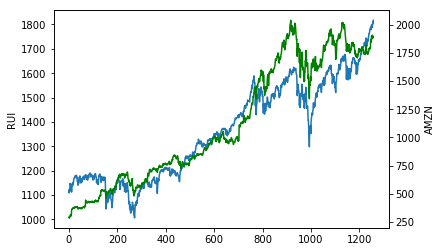

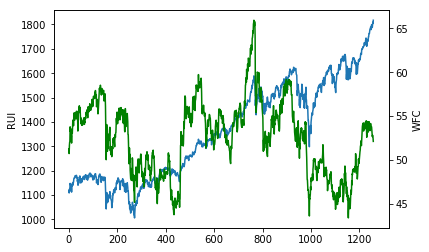

In [105]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('RUI')
ax1.plot(df['RUI'].values)
ax2 = ax1.twinx()
ax2.set_ylabel('AMZN')
ax2.plot(df['AMZN'].values,'g')
#ax2.tick_params(axis='y', labelcolor=color)
fig, ax1 = plt.subplots()
ax1.set_ylabel('RUI')
ax1.plot(df['RUI'].values)
ax2 = ax1.twinx()
ax2.set_ylabel('WFC')
ax2.plot(df['WFC'].values,'g')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [106]:
X = df.drop(['RUI'],axis=1)
y = df['RUI']
X.head()

,AAPL,AMZN,BA,BAC,BRK-B,CSCO,CVX,FB,GOOG,HD,...,MSFT,PFE,PG,T,UNH,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
14/01/2015,109.800003,293.269989,130.380005,16.040001,147.820007,27.92,103.900002,76.279999,499.498627,102.639999,...,45.959999,32.480000,89.989998,33.330002,103.330002,63.889999,46.970001,51.250000,86.610001,89.739998
15/01/2015,106.820000,286.950012,130.139999,15.200000,147.580002,27.41,102.669998,74.050003,500.416107,101.010002,...,45.480000,32.400002,89.860001,33.259998,104.459999,63.282501,47.099998,50.720001,87.379997,88.959999
16/01/2015,105.989998,290.739990,130.779999,15.380000,149.210007,27.68,105.120003,75.180000,506.688873,104.120003,...,46.240002,32.799999,91.250000,33.799999,105.769997,63.737499,47.990002,51.639999,86.769997,91.120003
20/01/2015,108.720001,289.440002,131.220001,15.260000,148.630005,28.07,106.470001,76.239998,505.512115,103.250000,...,46.389999,33.099998,91.190002,33.950001,105.620003,64.209999,48.180000,52.000000,86.690002,91.089996
21/01/2015,109.550003,297.250000,132.410004,15.410000,147.179993,27.84,108.160004,76.739998,516.621643,103.529999,...,45.919998,32.639999,90.730003,34.000000,109.320000,64.320000,48.250000,52.099998,86.639999,91.870003


In [107]:
X_train =X.iloc[0:1059]
y_train =y.iloc[0:1059]
X_test =X.iloc[1059:1080]
y_test =y.iloc[1059:1080]

In [108]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

#print(lr.coef_)
#print(lr.intercept_)
print(lr.score(X_test,y_test))
mse = mean_squared_error(y_test, y_pred)
print(mse)
print(r2_score(y_test, y_pred))
te = np.sqrt(np.var(y_pred - y_test.values))
print(te)

-2.1616567793
529.134564791
-2.1616567793
12.5733412637


Testing normality of residuals:

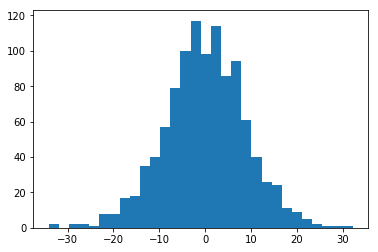

In [109]:
residuals = lr.predict(X_train) - y_train.values
hist = np.histogram(residuals, density=True)
plt.figure()
plt.hist(residuals, bins='auto')
plt.show()

In [110]:
k2, p = normaltest(residuals)
print(k2)
print(p)

10.0152657254
0.00668671295485


Visual proof and test confirm that the residuals are normal.

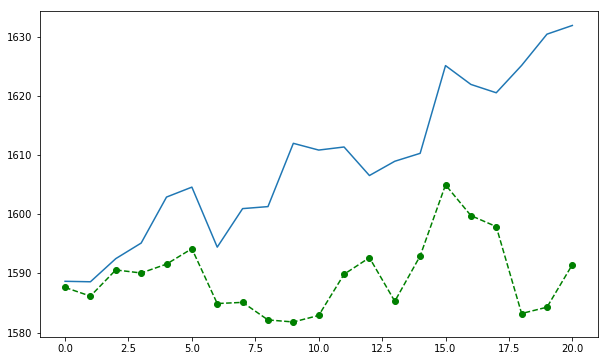

In [111]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values)
plt.plot(y_pred,'go--')
plt.show()

What if we calculate weights on a smaller sample...

In [112]:
X_train =X.iloc[807:1059] #exactly one year
y_train =y.iloc[807:1059]
X_test =X.iloc[1059:1080]
y_test =y.iloc[1059:1080]

lr = LinearRegression(fit_intercept=False)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(lr.coef_)
print(lr.score(X_test,y_test))
mse = mean_squared_error(y_test, y_pred)
print(mse)
te = np.sqrt(np.var(y_pred - y_test.values))
print(te)

[ 0.48059143  0.02985633  0.11703941  7.39720218  0.12911448  1.46189261
  0.09921321  0.23991403  0.10195222  0.99834932  1.34687817  1.44655199
 -1.10360096  0.06210715 -0.64955541  0.02699296  0.60605685  1.1228327
  4.72388273  0.3581406   0.55754682 -0.34295483  1.830867   -0.52868474
  1.24422425]
0.6328654235
61.4436062851
7.76211086991


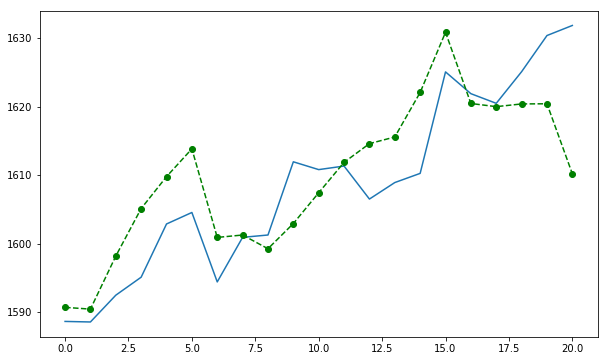

In [113]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values)
plt.plot(y_pred,'go--')
plt.show()

In [114]:
X_train =X.iloc[935:1059] #exactly 6 months
y_train =y.iloc[935:1059]
X_test =X.iloc[1059:1080]
y_test =y.iloc[1059:1080]

lr = LinearRegression(fit_intercept=False)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(lr.coef_)
print(lr.score(X_test,y_test))

mse = mean_squared_error(y_test, y_pred)
print(mse)
te = np.sqrt(np.var(y_pred - y_test.values))
print(te)

[  4.06167612e-01   2.04389281e-04   1.03171331e-01   6.34171934e+00
   6.70319341e-02  -1.38755240e+00   4.36962043e-01   3.13375198e-01
   1.24258502e-02   1.04401366e+00   1.48563750e+00   1.29780220e+00
   1.17823496e-01   9.65582129e-01  -4.76857805e-01   1.30817513e+00
  -5.65658704e-02   8.62646801e-01   3.79665799e+00   2.81058506e-01
  -1.45502969e-01   6.11287437e-01   1.72833367e+00  -8.74016312e-01
   1.43849413e+00]
0.695419507473
50.9745609998
6.48383280072


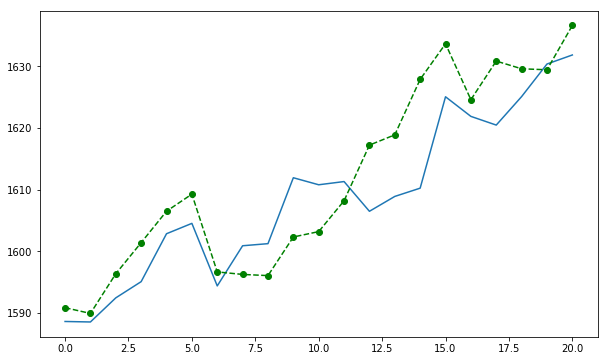

In [115]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values)
plt.plot(y_pred,'go--')
plt.show()

Fit and prediction are improved when using a smaller sample to train the model. 
Can we do better?

In [116]:
def lasso(alphas):
    coef_norm = []
    R_two = []
    for alpha in alphas:
        model = Lasso(alpha=alpha, fit_intercept=False,max_iter=3000)
        model.fit(X_train,y_train)
        coef_norm.append(sum(model.coef_**2))
        R_two.append(model.score(X_test,y_test))
    return coef_norm,R_two

coef_norm,R_two = lasso([5,7,9,10])
print(coef_norm)
print(R_two)

[90.078049769490917, 33.148017592900885, 13.932911617870589, 12.345166769856712]
[0.59616966855675324, 0.71972852020393485, 0.30392276700605836, 0.25399937384373539]


In [117]:
model = Lasso(alpha=7, fit_intercept=False,max_iter=3000)
model.fit(X_train,y_train)
print("R2 score: %f" % model.score(X_test,y_test))
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("mean_squared_error: %f" % mse)
te = np.sqrt(np.var(y_pred - y_test.values))
print("Tracking Error: %f" % te)
my_coef = model.coef_

R2 score: 0.719729
mean_squared_error: 46.906207
Tracking Error: 6.847884


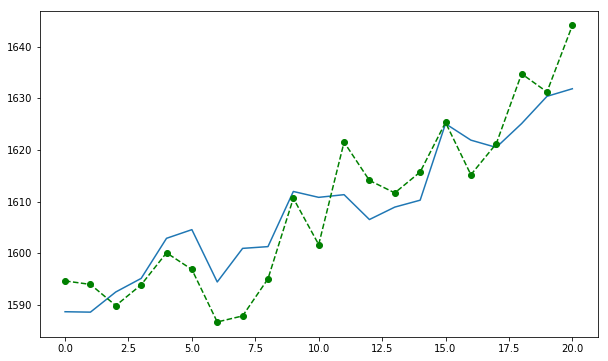

In [118]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values)
plt.plot(y_pred,'go--')
plt.show()

We get the best results with L1 regularization. Let's try a regression with less features:

In [119]:
my_coef_pd = pd.DataFrame(my_coef,index=X.columns,columns=['Coef'])
chosen = my_coef_pd[my_coef_pd['Coef']!=0].index.values
X_reduced = X[chosen]
X_reduced.head()

,AAPL,AMZN,BA,BAC,BRK-B,CSCO,CVX,FB,GOOG,HD,INTC,JNJ,MA,MRK,MSFT,PFE,PG,UNH,V,WMT
Date,,,,,,,,,,,,,,,,,,,,
14/01/2015,109.800003,293.269989,130.380005,16.040001,147.820007,27.92,103.900002,76.279999,499.498627,102.639999,36.349998,104.000000,83.459999,62.639999,45.959999,32.480000,89.989998,103.330002,63.889999,86.610001
15/01/2015,106.820000,286.950012,130.139999,15.200000,147.580002,27.41,102.669998,74.050003,500.416107,101.010002,36.189999,102.489998,82.250000,61.880001,45.480000,32.400002,89.860001,104.459999,63.282501,87.379997
16/01/2015,105.989998,290.739990,130.779999,15.380000,149.210007,27.68,105.120003,75.180000,506.688873,104.120003,36.450001,104.040001,83.800003,63.029999,46.240002,32.799999,91.250000,105.769997,63.737499,86.769997
20/01/2015,108.720001,289.440002,131.220001,15.260000,148.630005,28.07,106.470001,76.239998,505.512115,103.250000,36.090000,101.290001,84.260002,62.610001,46.389999,33.099998,91.190002,105.620003,64.209999,86.690002
21/01/2015,109.550003,297.250000,132.410004,15.410000,147.179993,27.84,108.160004,76.739998,516.621643,103.529999,36.480000,101.900002,83.720001,62.160000,45.919998,32.639999,90.730003,109.320000,64.320000,86.639999


In [120]:
X_train =X_reduced.iloc[935:1059] #exactly 6 months
y_train =y.iloc[935:1059]
X_test =X_reduced.iloc[1059:1080]
y_test =y.iloc[1059:1080]

lr = LinearRegression(fit_intercept=False)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(lr.coef_)
print(lr.score(X_test,y_test))

mse = mean_squared_error(y_test, y_pred)
print(mse)
te = np.sqrt(np.var(y_pred - y_test.values))
print(te)

[  0.66811414   0.03169298   0.05024469  10.64845072  -0.32828064
  -0.83228528   1.14461627   0.34836245  -0.05674784   1.39761385
   1.3905577    1.60068452   0.22113019   0.04385847   1.39550236
   2.53417297   1.0636229    0.20082705   0.52658464  -0.83363691]
0.285328566568
119.607340168
4.44232373183


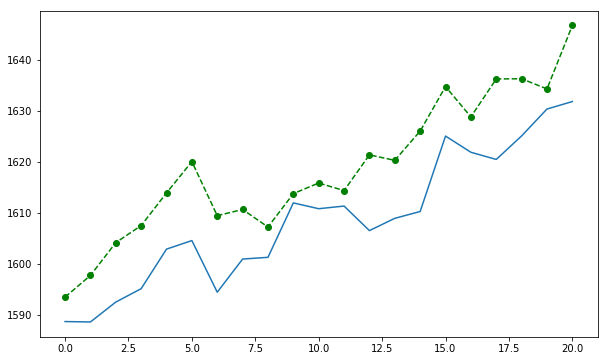

In [121]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values)
plt.plot(y_pred,'go--')
plt.show()

[  0.69953896   0.04713552   0.05626542  10.42441519  -0.28839037
  -0.52339843   1.20368687   0.28800681  -0.08343905   1.29327917
   1.70170468   1.55872064   0.31284325   0.2722465    1.05101828
   1.55682788   0.852818     0.21808094   0.48196358  -0.90684631]
0.522800642535
79.8640371035
4.70450534144


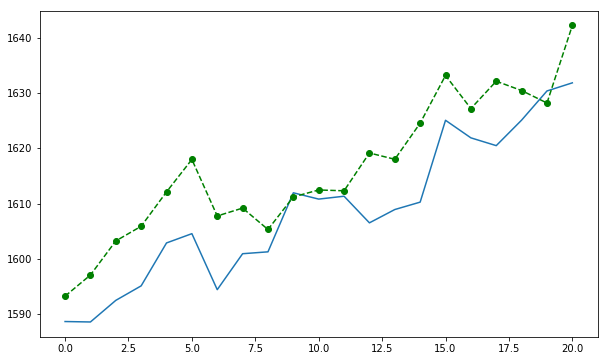

In [122]:
X_train =X_reduced.iloc[935:1059] #exactly 6 months
y_train =y.iloc[935:1059]
X_test =X_reduced.iloc[1059:1080]
y_test =y.iloc[1059:1080]

lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(lr.coef_)
print(lr.score(X_test,y_test))

mse = mean_squared_error(y_test, y_pred)
print(mse)
te = np.sqrt(np.var(y_pred - y_test.values))
print(te)

plt.figure(figsize=(10,6))
plt.plot(y_test.values)
plt.plot(y_pred,'go--')
plt.show()

Linear regression with L1 regularization bears the best results as it has the highest prediction power. 